In [6]:
#Change dir to root
% cd ..

In [12]:
#Import and load dependencies

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

from src.cleaning import load_and_clean

df = load_and_clean('data/raw/ev_metrics.csv')

(2769, 6)


,timestamp,Capacity,SOH,ambient_temperature,battery_id,test_id
0,2010-07-21 15:00:35,1.674305,63.417052,4,B0047,0
4,2010-07-21 21:02:56,1.524366,57.737883,4,B0047,4
6,2010-07-22 01:40:06,1.508076,57.120876,4,B0047,6
8,2010-07-22 06:16:21,1.483558,56.192197,4,B0047,8
10,2010-07-22 10:51:48,1.467139,55.570314,4,B0047,10


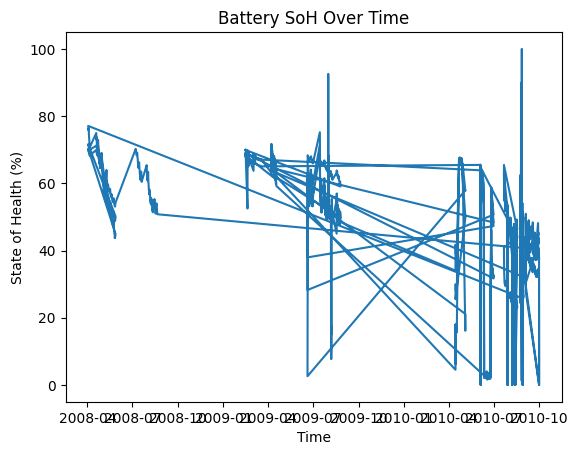

In [5]:
df = load_and_clean('data/raw/ev_metrics.csv')
print(df.shape)
display(df.head())

plt.plot(df['timestamp'], df ['SOH'])
plt.xlabel('Time')
plt.ylabel('State of Health (%)')
plt.title('Battery SoH Over Time')
plt.show()

### Quick Data Summary

First, let's check the shape of our DatFrame and get descriptive statistics for our key numerics colums. This will tell us how many observations we have and wheather values like 'Capacity' and 'SOH' fall into reasonable ranges.

In [10]:
###Quick Data Summary


print("Rows x Columns: ", df.shape)
print(df.dtypes)

display(df[['Capacity', 'SOH', 'ambient_temperature']].describe().transpose)

Rows x Columns:  (2769, 6)
timestamp              datetime64[ns]
Capacity                      float64
SOH                           float64
ambient_temperature             int64
battery_id                     object
test_id                         int64
dtype: object


<bound method DataFrame.transpose of           Capacity          SOH  ambient_temperature
count  2769.000000  2769.000000          2769.000000
mean      1.326543    50.245012            18.501264
std       0.472517    17.897348            12.302313
min       0.000000     0.000000             4.000000
25%       1.150286    43.568975             4.000000
50%       1.428065    54.090311            24.000000
75%       1.673645    63.392075            24.000000
max       2.640149   100.000000            44.000000>

### Battery Health Over Time

Here we plot 'SOH' against the parsed 'timestamp' to see how the battery capacity degrades with each discharge cycle. Look for gradual decline trends or any unusual jumps.


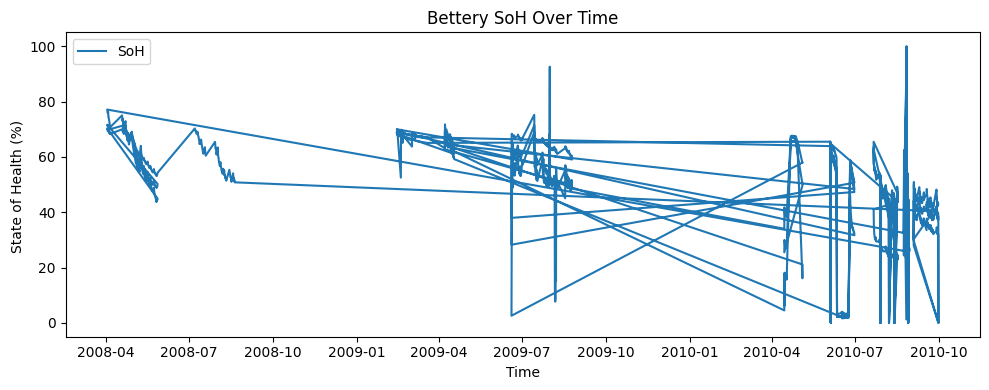

In [13]:
#SOH Over Time

plt.figure(figsize=(10,4))
plt.plot(df['timestamp'], df['SOH'], label='SoH')
plt.xlabel('Time')
plt.ylabel('State of Health (%) ')
plt.title('Bettery SoH Over Time')
plt.legend()
plt.tight_layout()
plt.show()

### SOH Distribution & Temperature Relationship

1. **Histogram**: Shows how `SOH` values are distributed across all discharge cycles.  
2. **Scatter plot**: Examines the relationship between 'ambient_temperature' and 'SOH', to see if hotter or colder conditions accelerate capacity loss.

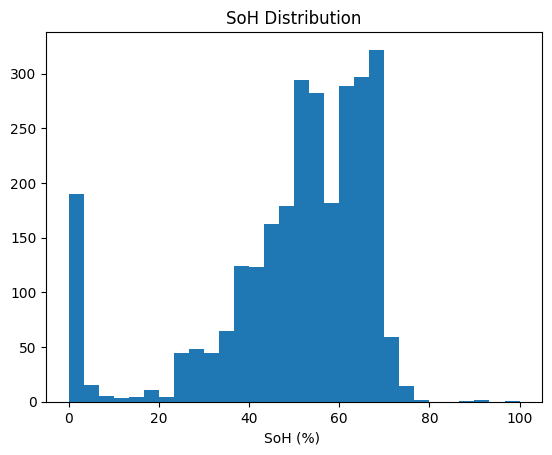

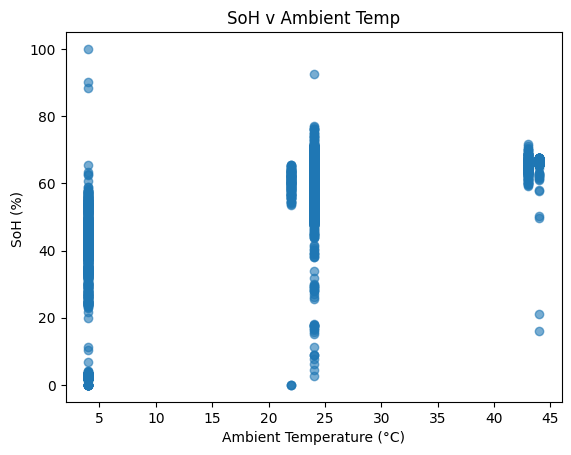

In [14]:
#Distribution and Scatter

plt.hist(df['SOH'], bins=30)
plt.xlabel('SoH (%) ')
plt.title('SoH Distribution')
plt.show()

plt.scatter(df['ambient_temperature'], df['SOH'], alpha=0.6)
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('SoH (%) ')
plt.title('SoH v Ambient Temp')
plt.show()

### Feature Correlation

We compute Pearson correlations among 'Capacity', 'SOH', and 'ambient_temperature'. High correlation between a predictor and 'SOH' suggests it may be useful in our LSTM model.


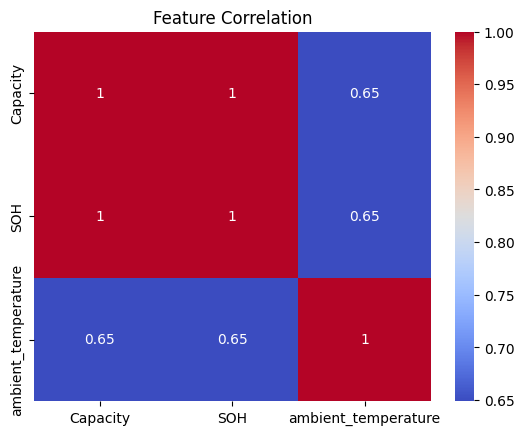

In [15]:
#Correlation Heatmap

corr = df[['Capacity', 'SOH', 'ambient_temperature']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

### Feature Engineering

We generate additional features to feed into our model:

1. **soh_diff**: the change in 'SOH' between successive measurements.  
2. **soh_roll_mean**: a rolling average of 'soh_diff' over 10 cycles.  
3. **cycle_idx**: a simple integer sequence for each discharge event.  
4. **temp_bin**: buckets of ambient temperature to capture non-linear effects.


In [16]:
#Feature Examples

df['soh_diff'] = df['SOH'].diff()
df['soh_roll_mean'] = df['soh_diff'].rolling(window=10).mean()
df['cycle_idx'] = range(len(df))
df['temp_bin'] = pd.cut(df['ambient_temperature'], bins=[-10,0,10,20,30,40])
display(df.head())

,timestamp,Capacity,SOH,ambient_temperature,battery_id,test_id,soh_diff,soh_roll_mean,cycle_idx,temp_bin
0,2010-07-21 15:00:35,1.674305,63.417052,4,B0047,0,NaN,NaN,0,"(0, 10]"
4,2010-07-21 21:02:56,1.524366,57.737883,4,B0047,4,-5.679169,NaN,1,"(0, 10]"
6,2010-07-22 01:40:06,1.508076,57.120876,4,B0047,6,-0.617007,NaN,2,"(0, 10]"
8,2010-07-22 06:16:21,1.483558,56.192197,4,B0047,8,-0.928679,NaN,3,"(0, 10]"
10,2010-07-22 10:51:48,1.467139,55.570314,4,B0047,10,-0.621883,NaN,4,"(0, 10]"
